In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
location = pd.read_csv("영업소찾기 (1).csv")

In [3]:
time = pd.read_csv("2019-2023통행시간 (5).csv", encoding="cp949")

In [4]:
location

,본부,지사,영업소,주소,우편번호(5자리),영업소코드,영업소명
0,수도권,시흥,서서울,경기도 안산시 상록구 장하로 141-2,15208.0,253,서서울
1,수도권,군포,군자,경기도 시흥시 군자로335번길 36-29,15004.0,254,군자
2,수도권,군포,서안산,경기도 안산시 단원구 시흥대로 19-30,15210.0,255,서안산
3,수도권,군포,안산,경기도 안산시 오리골길 15-1,15208.0,256,안산
4,수도권,군포,군포,경기도 군포시 영동고속도로 26,15884.0,215,군포
...,...,...,...,...,...,...,...
446,NaN,NaN,NaN,경상북도 칠곡군,NaN,774,남칠곡
447,NaN,NaN,NaN,대구광역시,NaN,775,동명동호
448,NaN,NaN,NaN,대구광역시,NaN,776,연경
449,NaN,NaN,NaN,대구광역시,NaN,777,파군재


In [5]:
time

,날짜,시,도착,통행,ymd
0,20190201,0,101,-1,2019020100000
1,20190201,0,102,552,2019020100000
2,20190201,0,103,447,2019020100000
3,20190201,0,105,588,2019020100000
4,20190201,0,106,926,2019020100000
...,...,...,...,...,...
182641,20230126,23,772,14843,20230126230000
182642,20230126,23,835,1003,20230126230000
182643,20230126,23,837,1078,20230126230000
182644,20230126,23,851,3848,20230126230000


In [6]:
time.columns=["집계일자","집계시","도착영업소코드","통행시간","ymd"]

In [7]:
df = pd.merge(location, time, left_on="영업소코드", right_on="도착영업소코드", how="right")
df

,본부,지사,영업소,주소,우편번호(5자리),영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd
0,수도권,수원,서울,경기도 성남시 분당구 대왕판교로 240 (궁내동),13550.0,101,서울,20190201,0,101,-1,2019020100000
1,수도권,군포,동수원,경기도 수원시 영통구 영동고속도로 36,16226.0,102,동수원,20190201,0,102,552,2019020100000
2,수도권,수원,수원신갈,경기도 용인시 기흥구 하갈로 240 (상갈동),17096.0,103,수원신갈,20190201,0,103,447,2019020100000
3,수도권,수원,기흥,경기도 용인시 기흥구 기흥단지로 7 (고매동),17086.0,105,기흥,20190201,0,105,588,2019020100000
4,수도권,수원,오산,경기도 오산시 원동로 105(원동),18150.0,106,오산,20190201,0,106,926,2019020100000
...,...,...,...,...,...,...,...,...,...,...,...,...
182641,NaN,NaN,NaN,대구광역시,NaN,772,북달성,20230126,23,772,14843,20230126230000
182642,NaN,NaN,NaN,경기도 용인시,NaN,835,서용인,20230126,23,835,1003,20230126230000
182643,NaN,NaN,NaN,경상남도,NaN,837,중리,20230126,23,837,1078,20230126230000
182644,NaN,NaN,NaN,충청북도 청주,NaN,851,서오창,20230126,23,851,3848,20230126230000


In [8]:
df = df.drop(["본부", "지사", "영업소", "우편번호(5자리)"], axis=1)

In [9]:
df["ymd"] = pd.to_datetime(df["ymd"], format="%Y%m%d%H%M%S")
df["year"] = df["ymd"].dt.year
df["MonthDay"] = df["ymd"].dt.strftime('%m-%d')

In [11]:
df['통행시간(시간)'] = df["통행시간"]/3600
df['통행시간(분)'] = df["통행시간"]/60

# Bokeh

In [72]:
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.io import output_file, show
from collections import OrderedDict
from ipywidgets import interact

output_notebook()

Loading BokehJS ...

# 대구

In [12]:
daegu = df[df["주소"].str.contains('대구광역시', na=False)]

In [14]:
daegu

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd,year,MonthDay,hour,통행시간(시간),통행시간(분)
18,대구광역시 서구 가르뱅이로 102-30 (상리동56-2),127,서대구,20190201,0,127,9781.0,2019-02-01 00:00:00,2019,02-01,00,2.716944,163.016667
20,대구광역시 북구 서변남로 121,129,북대구,20190201,0,129,9327.0,2019-02-01 00:00:00,2019,02-01,00,2.590833,155.450000
59,대구광역시 동구 도평로 114( 도동 971-43),230,팔공산,20190201,0,230,9198.0,2019-02-01 00:00:00,2019,02-01,00,2.555000,153.300000
60,대구광역시 달성군 현풍면 중부내륙지선고속도로 2,233,현풍,20190201,0,233,10408.0,2019-02-01 00:00:00,2019,02-01,00,2.891111,173.466667
112,대구광역시 수성구,623,수성,20190201,0,623,11014.0,2019-02-01 00:00:00,2019,02-01,00,3.059444,183.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182562,대구광역시 서구 가르뱅이로 102-30 (상리동56-2),127,서대구,20230126,23,127,11644.0,2023-01-26 23:00:00,2023,01-26,23,3.234444,194.066667
182564,대구광역시 북구 서변남로 121,129,북대구,20230126,23,129,11038.0,2023-01-26 23:00:00,2023,01-26,23,3.066111,183.966667
182594,대구광역시 동구 도평로 114( 도동 971-43),230,팔공산,20230126,23,230,13209.0,2023-01-26 23:00:00,2023,01-26,23,3.669167,220.150000
182638,대구광역시,730,유천,20230126,23,730,11542.0,2023-01-26 23:00:00,2023,01-26,23,3.206111,192.366667


# 결측치 대체

In [15]:
daegu["통행시간"] = daegu["통행시간"].fillna(daegu.groupby(["year","집계시"])["통행시간"].transform('mean'))

In [16]:
daegu

,주소,영업소코드,영업소명,집계일자,집계시,도착영업소코드,통행시간,ymd,year,MonthDay,hour
18,대구광역시 서구 가르뱅이로 102-30 (상리동56-2),127,서대구,20190201,0,127,9781.0,2019-02-01 00:00:00,2019,02-01,00
20,대구광역시 북구 서변남로 121,129,북대구,20190201,0,129,9327.0,2019-02-01 00:00:00,2019,02-01,00
59,대구광역시 동구 도평로 114( 도동 971-43),230,팔공산,20190201,0,230,9198.0,2019-02-01 00:00:00,2019,02-01,00
60,대구광역시 달성군 현풍면 중부내륙지선고속도로 2,233,현풍,20190201,0,233,10408.0,2019-02-01 00:00:00,2019,02-01,00
112,대구광역시 수성구,623,수성,20190201,0,623,11014.0,2019-02-01 00:00:00,2019,02-01,00
...,...,...,...,...,...,...,...,...,...,...,...
182562,대구광역시 서구 가르뱅이로 102-30 (상리동56-2),127,서대구,20230126,23,127,11644.0,2023-01-26 23:00:00,2023,01-26,23
182564,대구광역시 북구 서변남로 121,129,북대구,20230126,23,129,11038.0,2023-01-26 23:00:00,2023,01-26,23
182594,대구광역시 동구 도평로 114( 도동 971-43),230,팔공산,20230126,23,230,13209.0,2023-01-26 23:00:00,2023,01-26,23
182638,대구광역시,730,유천,20230126,23,730,11542.0,2023-01-26 23:00:00,2023,01-26,23


In [16]:
daegu_ymd = daegu.groupby("ymd").mean()
daegu_ymd

,영업소코드,집계일자,집계시,도착영업소코드,통행시간,year,통행시간(시간),통행시간(분)
ymd,,,,,,,,
2019-02-01 00:00:00,345.333333,20190201.0,0.000000,345.333333,10059.289683,2019.0,2.302176,138.130556
2019-02-01 03:00:00,324.714286,20190201.0,3.000000,324.714286,10241.168831,2019.0,2.425397,145.523810
2019-02-01 04:00:00,257.166667,20190201.0,4.000000,257.166667,9853.833333,2019.0,2.737176,164.230556
2019-02-01 05:00:00,257.166667,20190201.0,5.000000,257.166667,9793.666667,2019.0,2.720463,163.227778
2019-02-01 06:00:00,324.714286,20190201.0,6.000000,324.714286,9900.857143,2019.0,2.331905,139.914286
...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,441.000000,20230126.0,19.000000,441.000000,12367.896318,2023.0,3.094491,185.669444
2023-01-26 20:00:00,428.470588,20230126.0,12.588235,428.470588,11930.352941,2023.0,3.313987,198.839216
2023-01-26 21:00:00,364.000000,20230126.0,21.000000,364.000000,12218.000000,2023.0,3.393889,203.633333


# 1st Try

In [17]:
years = daegu['year'].unique()
years

array([2019, 2020, 2021, 2022, 2023], dtype=int64)

In [18]:
daegu_ymd = daegu_ymd.sort_values(["ymd"])

In [20]:
daegu_ymd = daegu_ymd.reset_index()

# 연도별 각 일자에 순서 부여
### -> order, 집계시별로 그래프 그리기..

In [21]:
daegu_ymd["order"] = daegu_ymd.groupby("year")["집계일자"].rank(method="dense", ascending=True)
daegu_ymd

,ymd,영업소코드,집계일자,집계시,도착영업소코드,통행시간,year,통행시간(시간),통행시간(분),order
0,2019-02-01 00:00:00,345.333333,20190201.0,0.000000,345.333333,10059.289683,2019.0,2.302176,138.130556,1.0
1,2019-02-01 03:00:00,324.714286,20190201.0,3.000000,324.714286,10241.168831,2019.0,2.425397,145.523810,1.0
2,2019-02-01 04:00:00,257.166667,20190201.0,4.000000,257.166667,9853.833333,2019.0,2.737176,164.230556,1.0
3,2019-02-01 05:00:00,257.166667,20190201.0,5.000000,257.166667,9793.666667,2019.0,2.720463,163.227778,1.0
4,2019-02-01 06:00:00,324.714286,20190201.0,6.000000,324.714286,9900.857143,2019.0,2.331905,139.914286,1.0
...,...,...,...,...,...,...,...,...,...,...
743,2023-01-26 19:00:00,441.000000,20230126.0,19.000000,441.000000,12367.896318,2023.0,3.094491,185.669444,8.0
744,2023-01-26 20:00:00,428.470588,20230126.0,12.588235,428.470588,11930.352941,2023.0,3.313987,198.839216,8.0
745,2023-01-26 21:00:00,364.000000,20230126.0,21.000000,364.000000,12218.000000,2023.0,3.393889,203.633333,8.0
746,2023-01-26 22:00:00,364.000000,20230126.0,22.000000,364.000000,12161.333333,2023.0,3.378148,202.688889,8.0


# order2 : 그냥 모든 시간에 순서 부여

In [22]:
daegu_ymd = daegu_ymd.reset_index()

In [23]:
daegu_ymd["order2"] = daegu_ymd.groupby("year")["ymd"].rank(method="dense", ascending=True)
daegu_ymd

,index,ymd,영업소코드,집계일자,집계시,도착영업소코드,통행시간,year,통행시간(시간),통행시간(분),order,order2
0,0,2019-02-01 00:00:00,345.333333,20190201.0,0.000000,345.333333,10059.289683,2019.0,2.302176,138.130556,1.0,1.0
1,1,2019-02-01 03:00:00,324.714286,20190201.0,3.000000,324.714286,10241.168831,2019.0,2.425397,145.523810,1.0,2.0
2,2,2019-02-01 04:00:00,257.166667,20190201.0,4.000000,257.166667,9853.833333,2019.0,2.737176,164.230556,1.0,3.0
3,3,2019-02-01 05:00:00,257.166667,20190201.0,5.000000,257.166667,9793.666667,2019.0,2.720463,163.227778,1.0,4.0
4,4,2019-02-01 06:00:00,324.714286,20190201.0,6.000000,324.714286,9900.857143,2019.0,2.331905,139.914286,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
743,743,2023-01-26 19:00:00,441.000000,20230126.0,19.000000,441.000000,12367.896318,2023.0,3.094491,185.669444,8.0,172.0
744,744,2023-01-26 20:00:00,428.470588,20230126.0,12.588235,428.470588,11930.352941,2023.0,3.313987,198.839216,8.0,173.0
745,745,2023-01-26 21:00:00,364.000000,20230126.0,21.000000,364.000000,12218.000000,2023.0,3.393889,203.633333,8.0,174.0
746,746,2023-01-26 22:00:00,364.000000,20230126.0,22.000000,364.000000,12161.333333,2023.0,3.378148,202.688889,8.0,175.0


In [24]:
daegu_ymd = daegu_ymd[daegu_ymd["order"]<=6]

In [25]:
years = daegu_ymd['year'].unique()

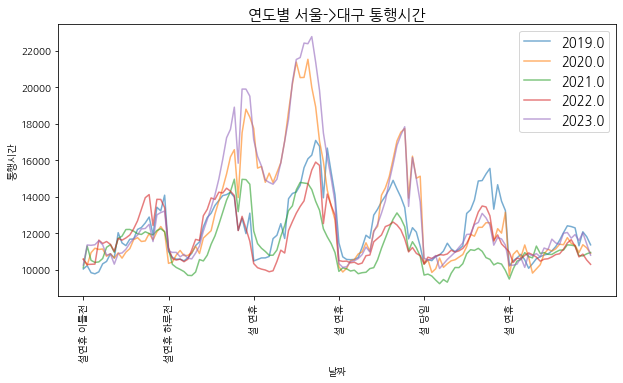

In [27]:
plt.figure(figsize=(10,5))
plt.title("연도별 서울->대구 통행시간", fontsize=15)
for y in years:
    d_ = daegu_ymd[(daegu_ymd["year"]==y)]
    x = d_["집계일자"]
    plt.plot(d_["order2"], d_["통행시간"], "-", label=str(y), alpha=.6)
    #plt.xlim(min(d_["집계일자"]), max(d_["집계일자"]))
    #plt.xlim(datetime.date(2019,2,1), datetime.date(2021,3,6))
#plt.grid()
plt.legend(fontsize=13)
plt.xticks(ticks = np.arange(1,132, 22), labels = ["설연휴 이틀전", "설연휴 하루전", "설 연휴", "설 연휴", "설 당일", "설 연휴"], rotation=90)

plt.xlabel("날짜")
plt.ylabel("통행시간")
plt.show()

# 울산

In [28]:
ulsan = df[df["주소"].str.contains('울산광역시', na=False)]

In [30]:
ulsan = ulsan.replace({"통행시간":-1}, np.nan)

In [31]:
ulsan["통행시간"] = ulsan["통행시간"].fillna(ulsan.groupby(["year","집계시"])["통행시간"].transform('mean'))

In [36]:
ulsan_ymd = ulsan.groupby("ymd").mean()

In [37]:
ulsan_ymd["order"] = ulsan_ymd.groupby("year")["집계일자"].rank(method="dense", ascending=True)
ulsan_ymd = ulsan_ymd.reset_index()

In [38]:
ulsan_ymd["order2"] = ulsan_ymd.groupby("year")["ymd"].rank(method="dense", ascending=True)
ulsan_ymd

,ymd,영업소코드,집계일자,집계시,도착영업소코드,통행시간,year,통행시간(시간),통행시간(분),order,order2
0,2019-02-01 00:00:00,390.0,20190201.0,0.0,390.0,13140.000000,2019.0,3.650000,219.000000,1.0,1.0
1,2019-02-01 03:00:00,643.0,20190201.0,3.0,643.0,14590.300000,2019.0,-0.000278,-0.016667,1.0,2.0
2,2019-02-01 09:00:00,641.0,20190201.0,9.0,641.0,13240.000000,2019.0,3.677778,220.666667,1.0,3.0
3,2019-02-01 10:00:00,642.0,20190201.0,7.0,642.0,14113.685185,2019.0,2.507315,150.438889,1.0,4.0
4,2019-02-01 11:00:00,641.0,20190201.0,11.0,641.0,13634.000000,2019.0,3.787222,227.233333,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
666,2023-01-26 17:00:00,641.0,20230126.0,17.0,641.0,16526.000000,2023.0,4.590556,275.433333,8.0,143.0
667,2023-01-26 18:00:00,641.0,20230126.0,18.0,641.0,16644.000000,2023.0,4.623333,277.400000,8.0,144.0
668,2023-01-26 19:00:00,642.0,20230126.0,19.0,642.0,17995.958333,2023.0,2.240694,134.441667,8.0,145.0
669,2023-01-26 20:00:00,641.0,20230126.0,2.0,641.0,18325.000000,2023.0,5.090278,305.416667,8.0,146.0


In [39]:
ulsan_ymd = ulsan_ymd[ulsan_ymd["order"]<=6]

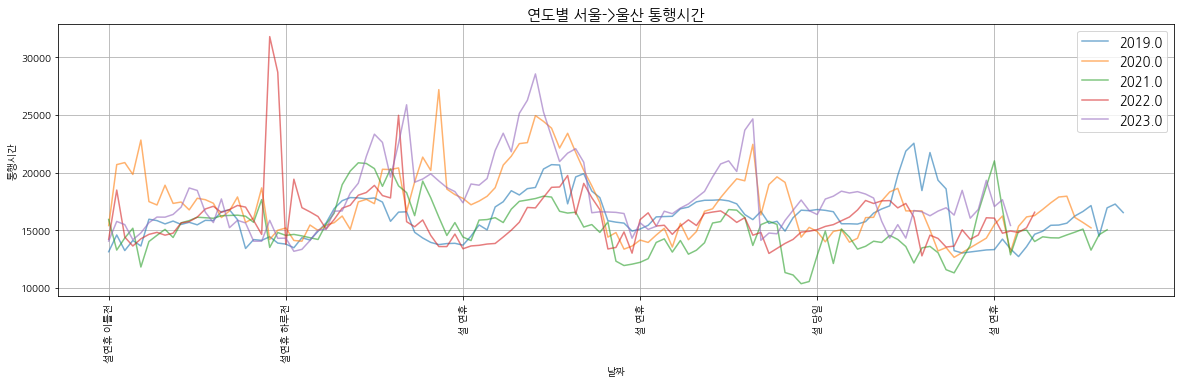

In [42]:
plt.figure(figsize=(20,5))
plt.title("연도별 서울->울산 통행시간", fontsize=15)
for y in years:
    d_ = ulsan_ymd[(ulsan_ymd["year"]==y)]
    x = d_["집계일자"]
    plt.plot(d_["order2"], d_["통행시간"], "-", label=str(y), alpha=.6)
    #plt.xlim(min(d_["집계일자"]), max(d_["집계일자"]))
    #plt.xlim(datetime.date(2019,2,1), datetime.date(2021,3,6))
plt.grid()
plt.legend(fontsize=13)
plt.xticks(ticks = np.arange(1,132, 22), labels = ["설연휴 이틀전", "설연휴 하루전", "설 연휴", "설 연휴", "설 당일", "설 연휴"], rotation=90)

plt.xlabel("날짜")
plt.ylabel("통행시간")
plt.show()